In [1]:
import sys
sys.path.append('/app')
from src.utils import data_utils
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_date = '2011-03-01'
var_ebosa = 'rr'
# var_ebosa = 'tg'
if var_ebosa == 'rr':
    var_era   = 'total_precipitation'
    var_cmip  = 'pr'
elif var_ebosa == 'tg':
    var_era   = '2m_temperature'
    var_cmip  = 'tas'

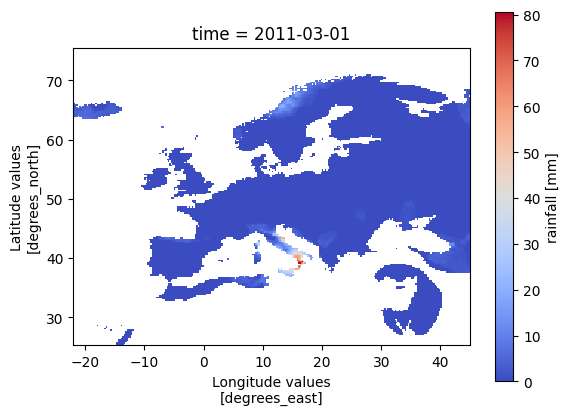

In [19]:
# import cartopy and add borders i guess
path_ebosa = f'/app/data/e-obs/ensemble_mean/025_grid/2011-2023/{var_ebosa}_v28.0e.nc'
z_ebosa = xr.open_mfdataset(path_ebosa)
lat_lims_ebosa = (float(z_ebosa.latitude.min().data), float(z_ebosa.latitude.max().data))
lon_lims_ebosa = (float(z_ebosa.longitude.min().data), float(z_ebosa.longitude.max().data))
# z_ebosa
z_ebosa = z_ebosa.sel(time=sample_date)
# z_ebosa = z_ebosa.to_array()
z_ebosa = z_ebosa[var_ebosa]
z_ebosa
plt.figure()
ax = z_ebosa.sel(longitude=slice(-22,45)).plot(cmap='coolwarm') #PuBu for prcp, RdBu_r inverse for temperate
ax.axes.set_aspect('equal')
plt.show()

z_ebosa

In [4]:
def lon_360_to_180(da):
    try:
        da = da.assign_coords({'longitude': (da.longitude.data + 180) % 360 - 180})
        da = da.sortby('longitude')
    except AttributeError:
        da = da.assign_coords({'lon': (da.lon.data + 180) % 360 - 180})
        da = da.sortby('lon')
    return da



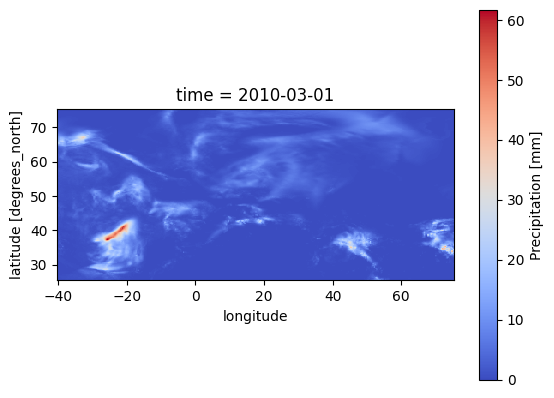

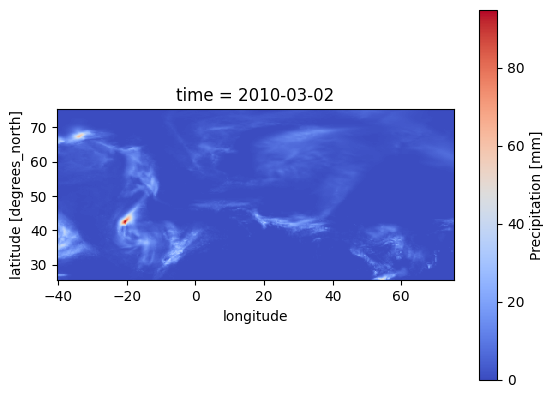

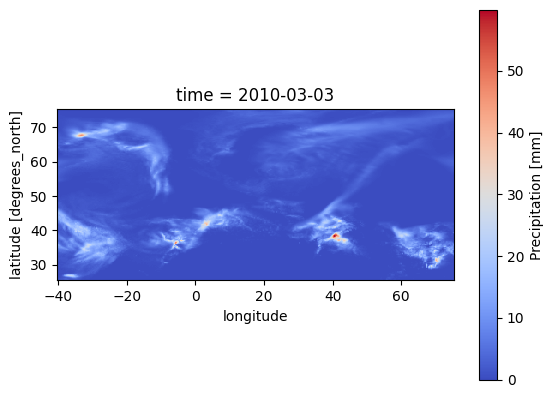

In [10]:
path_era = f'/app/data/era5/{var_era}_2010.zarr'
z_era = xr.open_zarr(path_era)

# z_cmip = z_cmip.assign_coords({'longitude': (z_cmip.longitude.data + 180) % 360 - 180})
# z_era = z_era.sortby('longitude')
z_era = lon_360_to_180(z_era)
z_era = z_era.sel(latitude=slice(lat_lims_ebosa[-1], lat_lims_ebosa[0]))
z_era = z_era.sel(longitude=slice(lon_lims_ebosa[0], lon_lims_ebosa[1]))

z_era = z_era[var_era]
if var_era == 'total_precipitation':
    z_era *= 1000
elif var_era == '2m_temperature':
    z_era -= 273
for i in range(3):
    plt.figure()
    z_era_t = z_era.sel(time=z_ebosa.time.data - np.timedelta64(365,'D') + np.timedelta64(i,'D'))
    if var_era == 'total_precipitation':
        ax = z_era_t.plot(cmap='coolwarm', cbar_kwargs={'label': "Precipitation [mm]"}) #coolwarm (cubehelix) for prcp, RdBu_r inverse for temperate
    elif var_era == '2m_temperature':
        ax = z_era_t.plot(cmap='RdBu_r', cbar_kwargs={'label': "Temperature" + r"[$^\circ C$]"}) #coolwarm (cubehelix) for prcp, RdBu_r inverse for temperate
    ax.axes.set_aspect('equal')

    plt.show()
# z = data_utils.read_zarr(path, 1)
# z.plot()

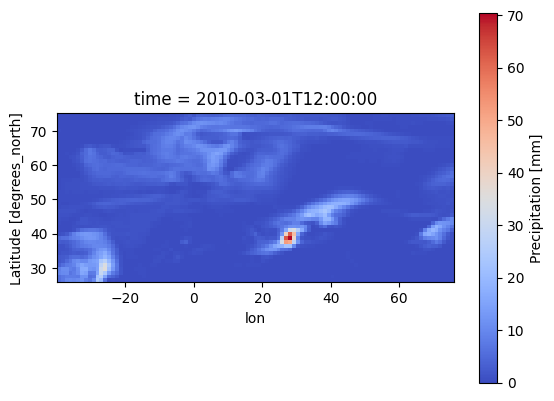

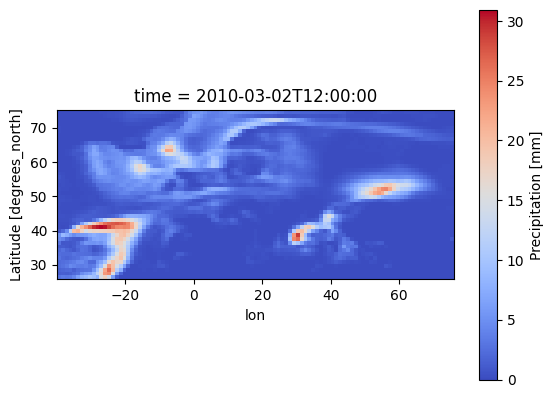

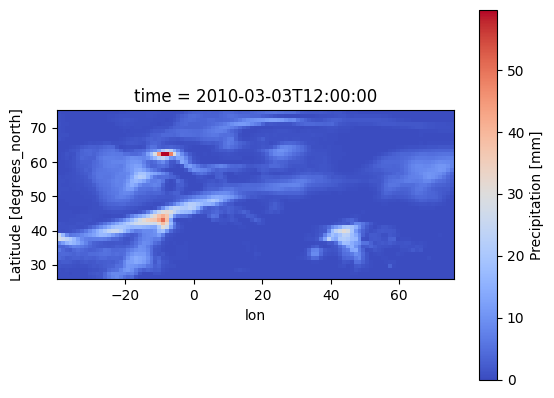

In [14]:
if var_cmip == 'pr':
    path_cmip = f'/app/data/cmip6/{var_cmip}_day_MRI-ESM2-0_historical_r1i1p1f1_gn_20000101-20141231.nc'
elif var_cmip == 'tas':
    path_cmip = f"/app/data/cmip6/{var_cmip}_CFsubhr_CNRM-CM6-1_historical_r3i1p1f2_gn_18500101003000-20150101000000.nc"


z_cmip = xr.open_mfdataset(path_cmip)
z_cmip
z_cmip = lon_360_to_180(z_cmip)
z_cmip = z_cmip.sel(lat=slice(lat_lims_ebosa[0], lat_lims_ebosa[1]))
z_cmip = z_cmip.sel(lon=slice(lon_lims_ebosa[0], lon_lims_ebosa[1]))

z_cmip = z_cmip[var_cmip]
if var_cmip == 'pr':
    z_cmip *= 86400
elif var_cmip == 'tas':
    pass
for i in range(3):
    plt.figure()
    z_cmip_t = z_cmip.sel(time=z_ebosa.time.data - np.timedelta64(365,'D') + np.timedelta64(12,'h') + np.timedelta64(i,'D'))
    if var_cmip == 'pr':
        ax = z_cmip_t.plot(cmap='coolwarm', cbar_kwargs={'label': "Precipitation [mm]"}) #PuBu for prcp, RdBu_r inverse for temperate
    elif var_cmip == 'tas':
        ax = z_cmip_t.plot(cmap='RdBu_r', cbar_kwargs={'label': "Temperature" + r"[$^\circ C$]"}) #PuBu for prcp, RdBu_r inverse for temperate
    ax.axes.set_aspect('equal')
    plt.show()

In [15]:
z_cmip

<xarray.DataArray 'pr' (time: 5479, lat: 44, lon: 103)> Size: 199MB
dask.array<mul, shape=(5479, 44, 103), dtype=float64, chunksize=(1, 44, 103), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 44kB 2000-01-01T12:00:00 ... 2014-12-31T12...
  * lat      (lat) float64 352B 26.36 27.48 28.6 29.72 ... 72.34 73.46 74.58
  * lon      (lon) float64 824B -39.38 -38.25 -37.12 -36.0 ... 73.12 74.25 75.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECIPI
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-05-10T01:39:22Z altered by CMOR: replaced missing va...